In [60]:
import pandas as pd
import numpy as np
import re
import geopandas as gpd
import json
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
from tqdm.notebook import tqdm
import pickle

In [3]:
%matplotlib inline

In [28]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

In [5]:
shapefilepath = 'GB_Postcodes/GB_Postcodes/PostalArea.shp'

In [95]:
pa = gpd.read_file(shapefilepath)
pa.sample(5)

,AreaID,PostArea,AreaName,PCCnt,RefPC,x,y,Sprawl,geometry
108,110,UB,Uxbridge,7137,UB48QT,510007,182308,London,"POLYGON ((517825.749 182817.688, 517822.690 18..."
54,56,KY,Kirkcaldy,9957,KY14DN,325893,697206,Kirkcaldy,"MULTIPOLYGON (((363836.684 709728.792, 363836...."
66,68,ML,Motherwell,9544,ML20AA,278369,655261,Hamilton,"POLYGON ((318444.852 634272.911, 318105.988 63..."
68,70,NE,Newcastle upon Tyne,32750,NE137AP,422101,571958,Newcastle Upon Tyne,"MULTIPOLYGON (((440586.462 564463.293, 440511...."
107,109,TW,Twickenham,11355,TW135HD,511751,173011,London,"MULTIPOLYGON (((521417.701 173173.099, 521404...."


In [8]:
mod = pickle.load(open('mod.p','rb'))

In [19]:
mod_pa = mod.reset_index().groupby('Postal Area').agg({'UARN':'nunique', 'CP Spaces':'sum', 'Adopted RV':'sum', 'Total Area':'sum', 'OtherFloor':'sum'})

In [20]:
mod_pa.reset_index(inplace=True)

In [22]:
mod_pa = pa.merge(mod_pa, right_on='Postal Area', left_on='PostArea', how='inner')

In [88]:
def postalareaplot(metric):
    f, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,7))
    f.suptitle('Total ' + metric + ' by Postal Area', fontsize=16)
    mod_pa.plot(ax=ax1, column=metric, legend=True)
    ax1.set(title='England and Wales')
    ax1.tick_params(labelbottom=False, labelleft=False)
    mod_pa[mod_pa['Sprawl']=='London'].plot(ax=ax2,column=metric, legend=True)
    ax2.set(title='London')
    ax2.tick_params(labelbottom=False, labelleft=False)

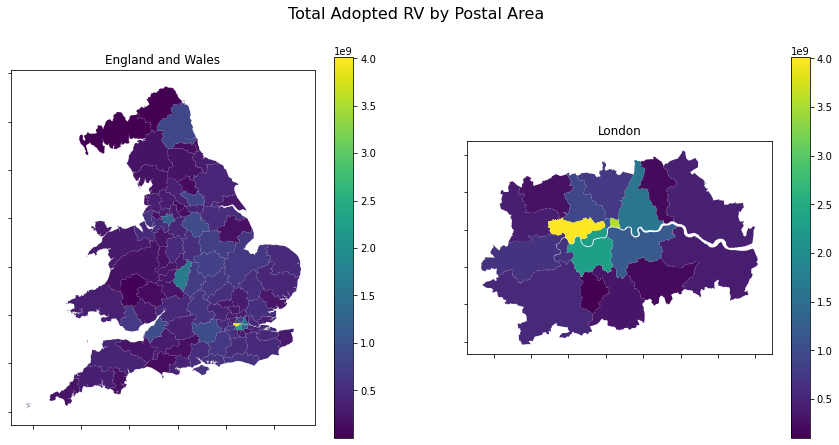

In [89]:
postalareaplot('Adopted RV')

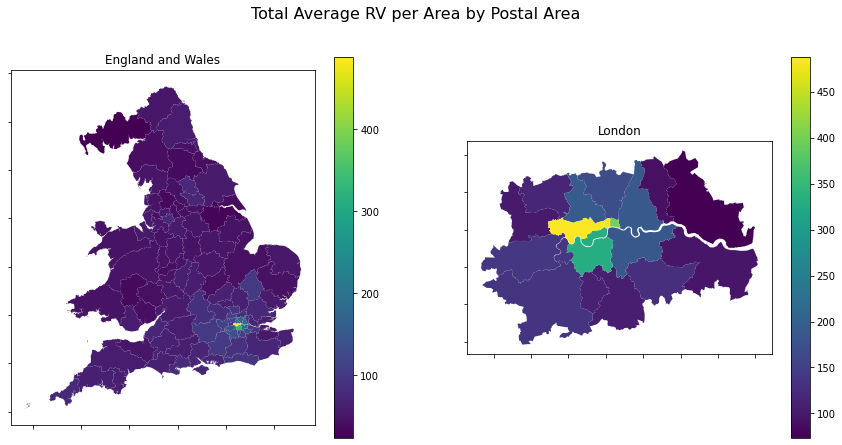

In [90]:
mod_pa['Average RV per Area'] = mod_pa['Adopted RV']/mod_pa['Total Area']
postalareaplot('Average RV per Area')

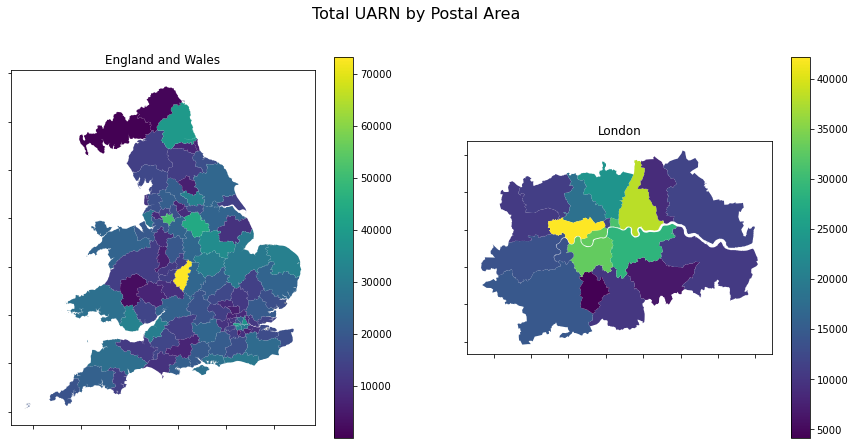

In [91]:
postalareaplot('UARN')

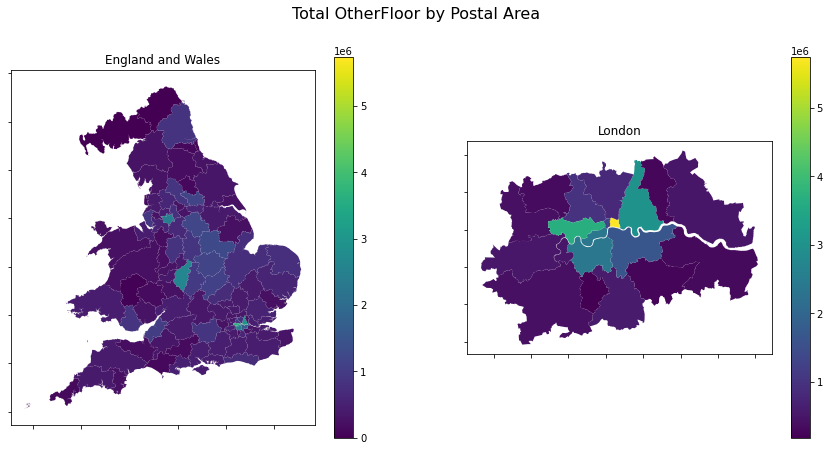

In [92]:
postalareaplot('OtherFloor')

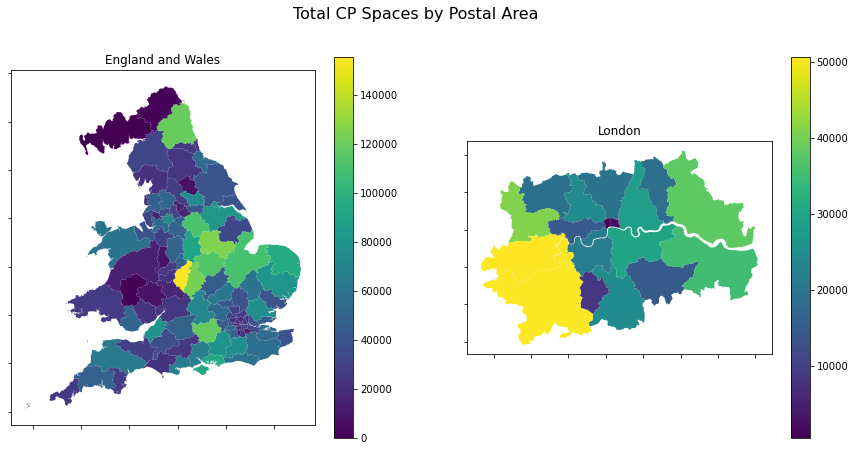

In [93]:
postalareaplot('CP Spaces')